# Visualizing statistical relationships

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Relating variables with scatter plots

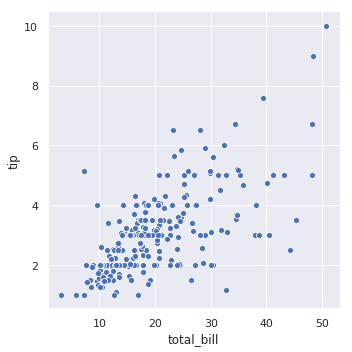

In [4]:
%matplotlib inline
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips)

虽然上图以二维绘制，但是通过根据第三变量对点着色可以将另一维度添加到图中。

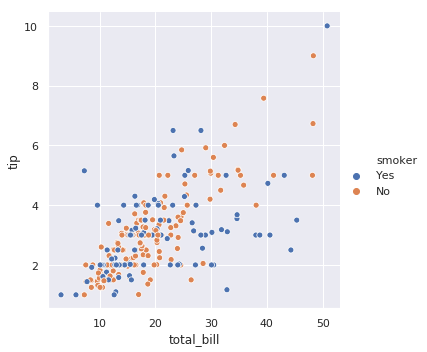

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

要强调类别之间的不同，提高可读性，你可以对每一个类别使用不同的标志样式

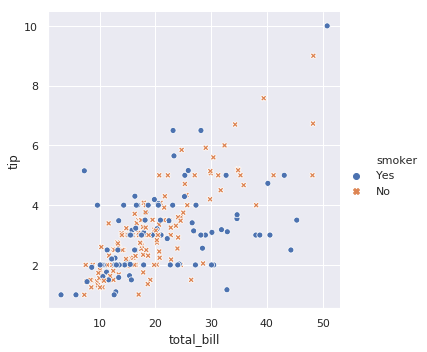

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

也可以通过改变每个点的样式和色调来表示四个变量，但你要小心处理，人眼对形状的辨识度远不如颜色

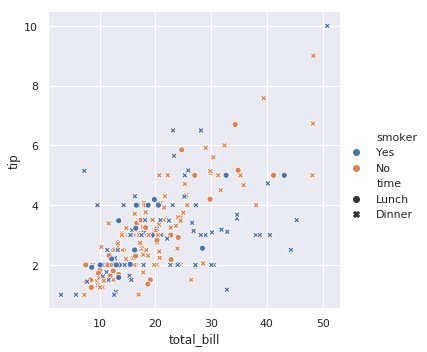

In [5]:
%matplotlib inline
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

上面例子中的色调语义上用来分类，所以应用了默认的[定性调色板](https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes)。如果色调在语义上是数字，尤其是可以转化为浮点数的情况，默认颜色切换为[连续调色板](https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-palettes)

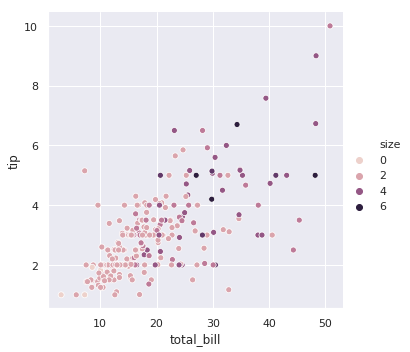

In [6]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

在两种情况下，你都可以自定义调色板，有很多选项调这。我们今天用字符接口调用[cubehelix_palette()](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html#seaborn.cubehelix_palette)来自定义连续调色板

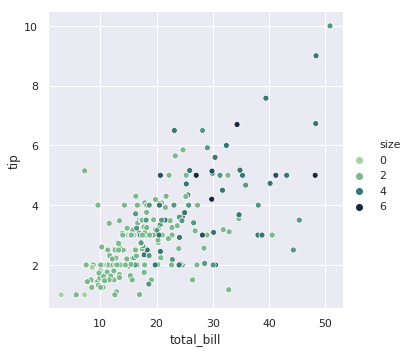

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)

第三类语义变量改变点的大小

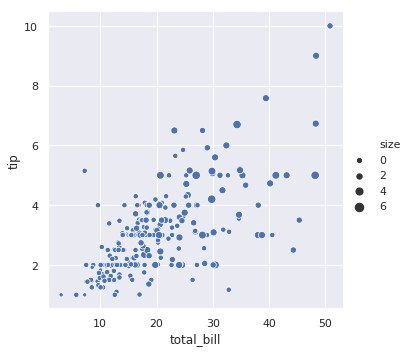

In [8]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

## 用线图来强调连续性
<p>散点图是高效的，单没有普适性的可视化。相反，可视化展示需要适配数据细节和你期望在可视化中揭示的</p>
<p>With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. In seaborn, this can be accomplished by the lineplot() function, either directly or with relplot() by setting kind="line":</p>

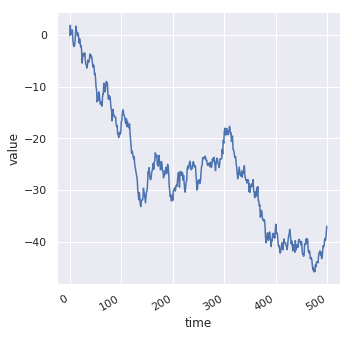

In [10]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
# 得到一个清晰的x轴
g.fig.autofmt_xdate()

<p>由于lineplot()假设你最常把y作为x的函数画，默认行为是在画图前根据x对y排序。然而，这可以被禁用</p>

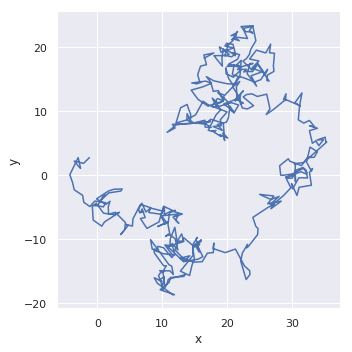

In [11]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

## 聚合和表示不确定性
<p>更多测量数据对于同一个x会有多个测量值。seaborn中默认会在x轴聚合多个测量值，通过画出均值和均值附近95%置信区间来表现</p>

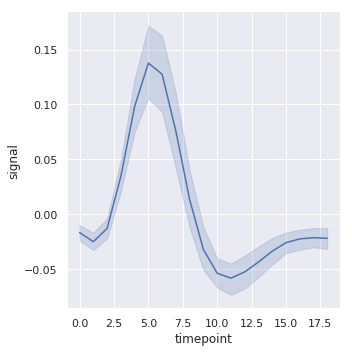

In [12]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

<p>置信区间是用‘bootstrapping’计算的，对于大数据集可以是时间密集的。也可以禁止它</p>

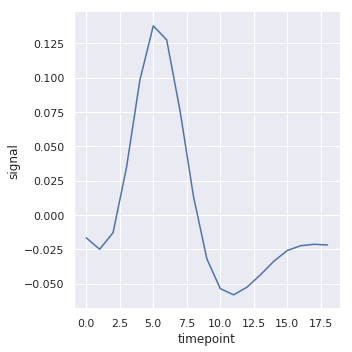

In [13]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

 <p>Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:</p>

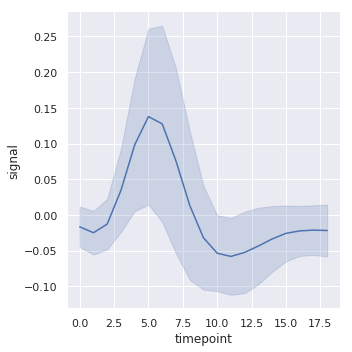

In [15]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

<p>To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.</p>

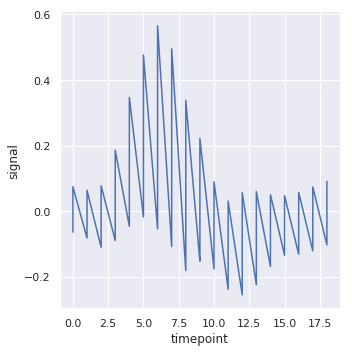

In [16]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)